# Starting notebook

Here we train a simple MLP on MNIST.

In [1]:
# Some useful modules for notebooks
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Test if the package is installed correctly
# from emfit import print_version
from matplotlib import pyplot as plt
from pinem import Pinem
import numpy as np
from dataset import DatasetPinem, TestPinem, normalize_spectra
# output directory


## Build an infinite dataset

In [6]:
x = np.linspace(-20,20,1024) # Here I recommend 1024 instaed of 1000
amplitude = 10
kernel = 'Gaussian'
n_cutoff = 50
background = 0.1
n = 64*1024

# g rt fwhm omega offset

dataset = DatasetPinem(x=x,
                       amplitude=amplitude, 
                       kernel=kernel, 
                       lower_bound=np.array([0.001,0.7,0.5,0.8,-2.0]),
                       upper_bound=np.array([3.0,0.7,1.2,2.0,2.0]),
                       n=n,
                       seed = 42,
                       n_cutoff=n_cutoff,
                       background=background)

0it [00:00, ?it/s]

65536it [14:37, 74.68it/s]


10.0
10.0


In [7]:
save_name = 'pinem_amp{}_bkgd{}_nort_seed{}.npz'.format(amplitude, background,dataset.seed)

In [8]:
dataset.save_model('./datasets/' + save_name)

In [9]:
# Note : I should replace the bounds by dictionaries to make things more robust.

test_model = np.load('./datasets/' + save_name)
lower_bound = test_model['bounds']['lower_bound']
upper_bound = test_model['bounds']['upper_bound']
omega = (lower_bound[3] + upper_bound[3])/2
fwhm = (lower_bound[2] + upper_bound[2])/2
offs = np.linspace(lower_bound[4], upper_bound[4], 50)
gs = np.linspace(lower_bound[0]+0.001, upper_bound[0], 50)
rts = (lower_bound[1] + upper_bound[1])/2

params_dict = {'omega':[omega], 'fwhm':[fwhm], 'offset':offs, 'g':gs, 'rt':[rts]}

save_folder = './datasets/test_model_{}'.format(save_name)

tp = TestPinem(dataset_file='./datasets/' + save_name, params_dict=params_dict, n = 50, true_coords_keys=['g'] )

tp.generate_data()

tp.save_data(save_folder)

2500it [00:33, 74.31it/s]

Data saved in ./datasets/test_model_pinem_amp10_bkgd0.1_nort_seed42.npz


In [38]:
omega, fwhm, offs

(1.4,
 0.85,
 array([-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
        -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
         0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
         1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ]))

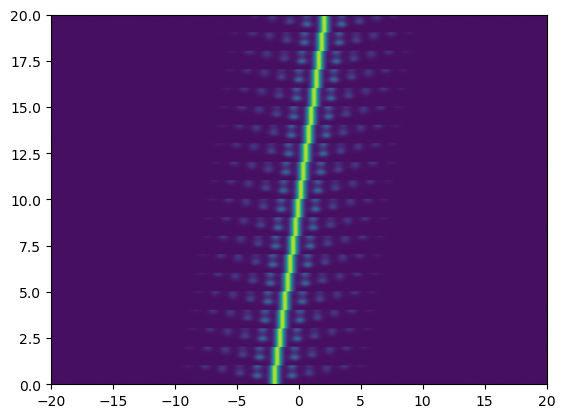

In [37]:
plt.imshow(tp.data, aspect='auto', origin='lower', extent=[tp.x[0], tp.x[-1], 0, 20], cmap='viridis')